## Borrower Reliability Study

Client: Bank’s Credit Department.
The goal is to determine whether a client’s marital status and number of children affect the likelihood of repaying a loan on time. The input data provided by the bank consists of client payment history statistics.
The results of this study will be used in building a credit scoring model — a specialized system that assesses a potential borrower’s ability to repay a loan to the bank.

### Step 1. Open the data file and examine the general information.

In [1091]:
import pandas as pd
data = pd.read_csv('/datasets/data.csv')

In [1092]:
data

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [1093]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
children            21525 non-null int64
days_employed       19351 non-null float64
dob_years           21525 non-null int64
education           21525 non-null object
education_id        21525 non-null int64
family_status       21525 non-null object
family_status_id    21525 non-null int64
gender              21525 non-null object
income_type         21525 non-null object
debt                21525 non-null int64
total_income        19351 non-null float64
purpose             21525 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [1094]:
data.describe()

,children,days_employed,dob_years,education_id,family_status_id,debt,total_income
count,21525.000000,19351.000000,21525.000000,21525.000000,21525.000000,21525.000000,1.935100e+04
mean,0.538908,63046.497661,43.293380,0.817236,0.972544,0.080883,1.674223e+05
std,1.381587,140827.311974,12.574584,0.548138,1.420324,0.272661,1.029716e+05
min,-1.000000,-18388.949901,0.000000,0.000000,0.000000,0.000000,2.066726e+04
25%,0.000000,-2747.423625,33.000000,1.000000,0.000000,0.000000,1.030532e+05
50%,0.000000,-1203.369529,42.000000,1.000000,0.000000,0.000000,1.450179e+05
75%,1.000000,-291.095954,53.000000,1.000000,1.000000,0.000000,2.034351e+05
max,20.000000,401755.400475,75.000000,4.000000,4.000000,1.000000,2.265604e+06


### Conclusion

1. The table consists of 21,525 rows and 12 columns.
2. There are 3 data types: float64 (2 columns), int64 (5 columns), object (5 columns).
3. The columns days_employed and total_income contain NaN values.
4. Most likely, the missing values appeared due to an incorrect data transfer or an error during the import, since the numbers are relatively large and of type float.


***4. Using the describe() method, the data issues became clearly visible:*** 
1. In the children column, the minimum number of children is -1, and the maximum is 20.
2. In days_employed, 19,351 rows are filled, and there are "-" values.
3. Since the above columns contain incorrect data, other parameters such as mean, min, max, etc., are also incorrect.

 Note: This is not a problem! In dob_years, the minimum client age is 43, and the maximum is 75.
In total_income, 19,351 rows are also filled.


### Step 2. Data Preprocessing

### Handling Missing Values

In [1095]:
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [1]:
# Check all non-numeric data types and integer columns for missing values using the `value_counts()` method

In [1097]:
data['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

In [2]:
# Remove rows with values "20" and "-1", since these data account for less than 1%.
data.drop(data.loc[data['children'] == -1].index, inplace=True)

NameError: name 'data' is not defined

In [1099]:
data.drop(data.loc[data['children'] == 20].index, inplace=True)

In [1100]:
data['children'].value_counts()

0    14149
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64

In [1101]:
# After the removal, the data type in the above column changed, and missing values appeared.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
children            21402 non-null int64
days_employed       19240 non-null float64
dob_years           21402 non-null int64
education           21402 non-null object
education_id        21402 non-null int64
family_status       21402 non-null object
family_status_id    21402 non-null int64
gender              21402 non-null object
income_type         21402 non-null object
debt                21402 non-null int64
total_income        19240 non-null float64
purpose             21402 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


In [1102]:
data['dob_years'].value_counts()

35    614
40    603
41    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
29    543
44    543
30    536
48    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
57    457
53    457
51    446
55    441
59    441
26    406
60    376
25    356
61    353
62    351
63    268
64    263
24    263
23    252
65    194
66    183
22    183
67    167
21    110
0     100
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

In [1103]:
data['education'].value_counts()

среднее                13667
высшее                  4698
СРЕДНЕЕ                  766
Среднее                  703
неоконченное высшее      665
ВЫСШЕЕ                   271
Высшее                   268
начальное                250
Неоконченное высшее       47
НЕОКОНЧЕННОЕ ВЫСШЕЕ       29
НАЧАЛЬНОЕ                 17
Начальное                 15
ученая степень             4
УЧЕНАЯ СТЕПЕНЬ             1
Ученая степень             1
Name: education, dtype: int64

In [1104]:
data['education_id'].value_counts()

1    15136
0     5237
2      741
3      282
4        6
Name: education_id, dtype: int64

In [1105]:
data['family_status'].value_counts()

женат / замужем          12302
гражданский брак          4160
Не женат / не замужем     2799
в разводе                 1189
вдовец / вдова             952
Name: family_status, dtype: int64

In [1106]:
data['family_status_id'].value_counts()

0    12302
1     4160
4     2799
3     1189
2      952
Name: family_status_id, dtype: int64

In [1107]:
data['gender'].value_counts()

F      14154
M       7247
XNA        1
Name: gender, dtype: int64

In [1108]:
data['income_type'].value_counts()

сотрудник          11050
компаньон           5054
пенсионер           3839
госслужащий         1453
безработный            2
предприниматель        2
в декрете              1
студент                1
Name: income_type, dtype: int64

In [1109]:
data['debt'].value_counts()

0    19670
1     1732
Name: debt, dtype: int64

In [1110]:
data['purpose'].value_counts()

свадьба                                   796
на проведение свадьбы                     772
сыграть свадьбу                           769
операции с недвижимостью                  673
покупка коммерческой недвижимости         661
покупка жилья для сдачи                   651
операции с жильем                         648
операции с коммерческой недвижимостью     646
жилье                                     642
покупка жилья                             641
покупка жилья для семьи                   640
недвижимость                              632
строительство собственной недвижимости    628
операции со своей недвижимостью           626
строительство жилой недвижимости          622
строительство недвижимости                620
покупка недвижимости                      619
покупка своего жилья                      619
ремонт жилью                              609
покупка жилой недвижимости                603
на покупку своего автомобиля              504
заняться высшим образованием      

In [1111]:
# Since missing values were detected in the previous two rows, we immediately use the `isnull()` method to count them.

In [1112]:
data[data['days_employed'].isnull()].count()

children            2162
days_employed          0
dob_years           2162
education           2162
education_id        2162
family_status       2162
family_status_id    2162
gender              2162
income_type         2162
debt                2162
total_income           0
purpose             2162
dtype: int64

In [1113]:
data[data['total_income'].isnull()].count()

children            2162
days_employed          0
dob_years           2162
education           2162
education_id        2162
family_status       2162
family_status_id    2162
gender              2162
income_type         2162
debt                2162
total_income           0
purpose             2162
dtype: int64

In [1114]:
# Replaced the "-" symbol in the `days_employed` column, as it would distort the data when calculating the mean.
#data['days_employed'] = data['days_employed'].apply(lambda x: float(str(x).replace('-', '')))
data['days_employed'] = data['days_employed'].abs()

In [1115]:
# Before filling in the missing values, convert the data from days to years.
data['days_employed'] = data['days_employed'] / 365.0

In [1116]:
data['days_employed']

0          23.116912
1          11.026860
2          15.406637
3          11.300677
4         932.235814
5           2.537495
6           7.888225
7           0.418574
8          18.985932
9           5.996593
10         11.428722
11          2.171786
12               NaN
13          5.059293
14          5.054674
15          2.664012
16          4.712149
17          6.493150
18       1096.660649
19         27.503612
20          3.593436
21          0.695028
22          4.840121
23          0.747894
24        927.539597
25        996.023258
26               NaN
27          1.449840
28          1.965135
29               NaN
            ...     
21495            NaN
21496       2.081317
21497            NaN
21498       3.645556
21499      27.202781
21500       1.583788
21501     916.008483
21502            NaN
21503       8.484606
21504     973.248570
21505     928.506483
21506       4.263698
21507       0.218718
21508    1058.897847
21509     992.222066
21510            NaN
21511       1

In [1117]:
# In some rows, clients have several hundred years of experience, which is clearly incorrect.
data['days_employed'].value_counts().head(20)

4.366976       1
0.748976       1
16.233391      1
0.341532       1
2.391293       1
8.823936       1
6.962928       1
1.536298       1
0.922220       1
0.715440       1
2.369862       1
997.838724     1
5.541319       1
4.080822       1
4.413854       1
1057.984717    1
12.186781      1
0.881772       1
11.258807      1
8.196298       1
Name: days_employed, dtype: int64

###### Considering that the maximum age of clients is 75 years, their work experience on average cannot exceed 60 years. Therefore, we will display new data for all columns using the condition of values greater than 60 years.

In [1118]:
#row_index = data[(data['days_employed'] > 60.0)]

##### As can be seen from the table, the data are absurd for several reasons: 1. Unrealistic work experience values. 2. The clients’ education level is mostly “secondary.” 3. The clients’ employment status is “pensioner” with an unrealistically high income.

<span style="color:blue"> Created a new dataset with the condition `days_employed <= 60.0` to calculate the maximum work experience and later use it to fill missing values. </span>

In [1119]:
row_index1 = data[(data['days_employed'] <= 60.0)]
row_index1.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,23.116912,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,11.026860,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,15.406637,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,11.300677,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
5,0,2.537495,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья


<span style="color:blue">First, I checked that there were no missing values in the new dataset.
</span>

In [1120]:
row_index1[row_index1['income_type'].isnull()].count()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

<span style="color:blue">I calculated the maximum value</span>

In [1121]:
years_employed_max = row_index1['days_employed'].max()
years_employed_max

50.38068465909146

In [1122]:
row_index1['income_type'].value_counts()

сотрудник          9949
компаньон          4550
госслужащий        1307
в декрете             1
студент               1
предприниматель       1
Name: income_type, dtype: int64

<span style="color:blue">Created a function that iterates over the entire DataFrame, finds values greater than 60, replaces them with the maximum work experience, and outputs the result into a new column years_employed.</span>

In [1123]:
def new_years_employed(value):
    if value > 60:
        return years_employed_max
    return value
data['years_employed'] = data['days_employed'].apply(new_years_employed)
data.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed
0,1,23.116912,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912
1,1,11.026860,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860
2,0,15.406637,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637
3,3,11.300677,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677
4,0,932.235814,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685


In [1124]:
# Удаляем столбец ['days_employed']
del data['days_employed']

<span style="color:blue">Calculated the median value to later fill missing values.</span>

In [1125]:
years_employed_median = data['years_employed'].median()
years_employed_median

6.0143879219832765

In [1126]:
data[data['years_employed'].isnull()].count()

children            2162
dob_years           2162
education           2162
education_id        2162
family_status       2162
family_status_id    2162
gender              2162
income_type         2162
debt                2162
total_income           0
purpose             2162
years_employed         0
dtype: int64

<span style="color:blue">Filled in the missing values and checked for any remaining missing values.</span>

In [1127]:
data['years_employed'] = data['years_employed'].fillna(value=years_employed_median)

In [1128]:
data[data['years_employed'].isnull()].count()

children            0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
years_employed      0
dtype: int64

#### We will remove all these rows so that the data are not distorted, despite the fact that this amounts to 3,446 rows.

In [1131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21402 entries, 0 to 21524
Data columns (total 12 columns):
children            21402 non-null int64
dob_years           21402 non-null int64
education           21402 non-null object
education_id        21402 non-null int64
family_status       21402 non-null object
family_status_id    21402 non-null int64
gender              21402 non-null object
income_type         21402 non-null object
debt                21402 non-null int64
total_income        19240 non-null float64
purpose             21402 non-null object
years_employed      21402 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


####  Since a large number of rows were removed and the number of missing values is about 10% of the total, it is reasonable to fill in the missing values.

<span style="color:blue"> The education column was converted to lowercase to make it possible to create a pivot table based on the parameters you suggested — “Here you can do something more complex, for example, calculate the median salary by (education, occupation) and then fill the missing values using these results."
</span>

In [1135]:
data['education_lowercase'] = data['education'].str.lower()

In [1136]:
del data['education']

In [1137]:
data_income = data.pivot_table(index=['education_lowercase','income_type'], values='total_income', aggfunc='median')
data_income

total_income
education_lowercase income_type                   
высшее              безработный      202722.511368
                    госслужащий      172277.866531
                    компаньон        201911.716329
                    пенсионер        143939.043160
                    предприниматель  499163.144947
                    сотрудник        166117.985596
                    студент           98201.625314
начальное           госслужащий      148339.290825
                    компаньон        136798.905143
                    пенсионер        102598.653164
                    сотрудник        125994.910603
неоконченное высшее госслужащий      160592.345303
                    компаньон        179937.527982
                    пенсионер        120136.896353
                    сотрудник        151308.937846
среднее             безработный       59956.991984
                    в декрете         53829.130729
                    госслужащий      136548.656488
                    компаньон        159039.188909
                    пенсионер        114816.695032
                    сотрудник        136496.297809
ученая степень      госслужащий      111392.231107
                    пенсионер        177088.845999
                    сотрудник        198570.757322

<span style="color:blue">I wrote a function that iterates over the rows of the DataFrame and fills in the missing values in total_income with the corresponding values from the pivot table.</span>

In [1138]:
def fill_by_education_and_income(value):
    if value.isna()['total_income']==True:
        value['total_income'] = data_income.loc[value['education_lowercase'], value['income_type']]['total_income']
        return value
    return value

In [1139]:
data = data.apply(fill_by_education_and_income, axis=1)
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее


In [1140]:
data[data['total_income'].isnull()].count()

children               0
dob_years              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income           0
purpose                0
years_employed         0
education_lowercase    0
dtype: int64

In [1142]:
data.drop(data.loc[data['dob_years'] == 0].index, inplace=True)

In [1143]:
data['dob_years'].value_counts()

35    614
40    603
41    603
34    597
38    595
42    592
33    577
39    572
31    556
36    553
29    543
44    543
30    536
48    536
37    531
43    510
50    509
32    506
49    505
28    501
45    494
27    490
52    483
56    482
47    480
54    476
46    469
58    461
53    457
57    457
51    446
55    441
59    441
26    406
60    376
25    356
61    353
62    351
63    268
64    263
24    263
23    252
65    194
66    183
22    183
67    167
21    110
68     99
69     83
70     65
71     58
20     51
72     33
19     14
73      8
74      6
75      1
Name: dob_years, dtype: int64

##### Теперь снова проверила общее количество строк по всех столбцах

In [1144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21302 entries, 0 to 21524
Data columns (total 12 columns):
children               21302 non-null int64
dob_years              21302 non-null int64
education_id           21302 non-null int64
family_status          21302 non-null object
family_status_id       21302 non-null int64
gender                 21302 non-null object
income_type            21302 non-null object
debt                   21302 non-null int64
total_income           21302 non-null float64
purpose                21302 non-null object
years_employed         21302 non-null float64
education_lowercase    21302 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


### Conclusion

1. Missing values were found in 2 columns of type float: days_employed and total_income — 2,174 rows out of 21,525.
2. Duplicates are present in the education and purpose columns.
3. In the dob_years column, there are 101 clients with an age of 0 (range 0–101).

## Conclusion
1. Using value_counts(), I found the unique values and removed 2 incorrect entries from the children column. Their removal does not distort the data, as there were very few rows.
2. Using isnull().count(), I found the number of missing values in days_employed and total_income.
3. Using abs(), I replaced all “-” values in days_employed.
4. Since the values in days_employed were large and given in days, I divided them by 365 to convert them to years. During this, incorrect values were discovered.
5. Considering that the maximum client age is 75, I applied the condition days_employed > 60.0 to compare this column with others.
6. Created a new column years_employed and removed days_employed.
7. Replaced incorrect values in years_employed greater than 60 with the median value.
8. Filled missing values in total_income using values from the pivot table.
9. Removed rows with a value of 0 in dob_years.

### Data type conversion

In [1145]:
data.head(10)

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее
5,0,27,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,2.537495,высшее
6,0,43,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,7.888225,высшее
7,0,50,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,0.418574,среднее
8,2,35,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,18.985932,высшее
9,0,41,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,5.996593,среднее


In [1149]:
data['total_income'] = pd.to_numeric(data['total_income'], errors='coerce')

In [1150]:
data['children'].value_counts()

0    14080
1     4802
2     2042
3      328
4       41
5        9
Name: children, dtype: int64

In [1151]:
#data['children'] = data['children'].astype('int')
data['children'] = pd.to_numeric(data['children'], errors='coerce')

In [1152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21302 entries, 0 to 21524
Data columns (total 12 columns):
children               21302 non-null int64
dob_years              21302 non-null int64
education_id           21302 non-null int64
family_status          21302 non-null object
family_status_id       21302 non-null int64
gender                 21302 non-null object
income_type            21302 non-null object
debt                   21302 non-null int64
total_income           21302 non-null float64
purpose                21302 non-null object
years_employed         21302 non-null float64
education_lowercase    21302 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ MB


### Conclusion

1. Used to_numeric to convert the data type of the days_employed and total_income columns from object to float64.
2. When removing rows in the children column, the data type changed, so I again used to_numeric to convert it to float64.

### Handling duplicates

In [1153]:
data['education_lowercase'].value_counts()

среднее                15073
высшее                  5202
неоконченное высшее      739
начальное                282
ученая степень             6
Name: education_lowercase, dtype: int64

In [1154]:
#data['education'].duplicated().sum()

In [1155]:
data['education_lowercase'].drop_duplicates().reset_index(drop = True)

0                 высшее
1                среднее
2    неоконченное высшее
3              начальное
4         ученая степень
Name: education_lowercase, dtype: object

In [1156]:
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее


In [1157]:
data['purpose'].drop_duplicates().reset_index(drop = True)

0                              покупка жилья
1                    приобретение автомобиля
2                 дополнительное образование
3                            сыграть свадьбу
4                          операции с жильем
5                                образование
6                      на проведение свадьбы
7                    покупка жилья для семьи
8                       покупка недвижимости
9          покупка коммерческой недвижимости
10                покупка жилой недвижимости
11    строительство собственной недвижимости
12                              недвижимость
13                строительство недвижимости
14        на покупку подержанного автомобиля
15              на покупку своего автомобиля
16     операции с коммерческой недвижимостью
17          строительство жилой недвижимости
18                                     жилье
19           операции со своей недвижимостью
20                                автомобили
21                     заняться образованием
22        

In [1158]:
data['income_type'].drop_duplicates().reset_index(drop=True)

0          сотрудник
1          пенсионер
2          компаньон
3        госслужащий
4        безработный
5    предприниматель
6            студент
7          в декрете
Name: income_type, dtype: object

In [1159]:
from nltk.stem import SnowballStemmer 
russian_stemmer = SnowballStemmer('russian')

In [1160]:
# I tried to stem the words in the `purpose` column, but when counting, the number of rows became larger than the original (22,280 instead of 21,525).
purpose_modified = []
for purpose in data['purpose']:
    for word in purpose.split(' '):
        purposes_word = russian_stemmer.stem(word)
        if purposes_word == 'свадьб':
            purpose_modified.append('свадьба')
        if purposes_word == 'жил':
            purpose_modified.append('жилье')
        if purposes_word == 'недвижим':
            purpose_modified.append('недвижимость')
        if purposes_word == 'автомобил':
            purpose_modified.append('автомобиль')
        if purposes_word == 'образован':
            purpose_modified.append('образование')
print(pd.Series(purpose_modified).value_counts().sum())

22047


### Conclusion

Вывела сумму дубликатов в столбцах ['education'] и ['purpose'] методом str.lower() привела к нижнему регистру столбец ['education']

#### Conclusion
##### Calculated the total number of duplicates in the education and purpose columns. Converted the education column to lowercase using str.lower(). Used value_counts() to review the purpose and income_type columns for duplicates. Converted the education column to lowercase again and added it as a new column education_lowercase. Duplicates in the above columns were removed using drop_duplicates().

### Lemmatization

##### Added a count of unique words.

In [1161]:
from pymystem3 import Mystem
from collections import Counter
m = Mystem()
lemmas = m.lemmatize(''.join(data['purpose'].values))

Counter(lemmas)

Counter({'покупка': 1440,
         ' ': 33352,
         'жильяприобретение': 23,
         'автомобиляпокупка': 411,
         'жильядополнительный': 23,
         'образованиесыграть': 58,
         'свадьбупокупка': 171,
         'жильяоперация': 147,
         'с': 2892,
         'жильемобразованиен': 7,
         'проведение': 768,
         'свадьбыпокупка': 168,
         'жилье': 1288,
         'для': 1288,
         'семьипокупка': 129,
         'недвижимостипокупка': 797,
         'коммерческий': 1302,
         'недвижимостисыграть': 126,
         'свадьбуприобретение': 15,
         'жилой': 1219,
         'недвижимостистроительство': 307,
         'собственный': 626,
         'недвижимостинедвижимостьстроительство': 12,
         'недвижимостина': 391,
         'подержать': 885,
         'автомобиляна': 184,
         'свой': 1698,
         'автомобилянедвижимостьприобретение': 2,
         'подержанный': 69,
         'автомобилясыграть': 72,
         'свадьбуоперация': 103,
         'не

In [1162]:
def define_purpose_from_lemmas(lemmas):
    if 'автомобиль' in lemmas:
        return 'автомобиль'
    elif 'недвижимость' in lemmas:
        return 'недвижимость'
    elif 'покупка' in lemmas:
        return 'недвижимость'
    elif 'строительство' in lemmas:
        return 'недвижимость'
    elif 'жилье' in lemmas:
        return 'недвижимость'
    elif 'образование' in lemmas:
        return 'образование'
    elif 'свадьба' in lemmas:
        return 'свадьба'
def define_purpose(purpose):
    lemmas = m.lemmatize(purpose)
    return define_purpose_from_lemmas(lemmas)

data['purpose_modified'] = data['purpose'].apply(define_purpose)
data.head(10)

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба
5,0,27,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья,2.537495,высшее,недвижимость
6,0,43,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем,7.888225,высшее,недвижимость
7,0,50,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование,0.418574,среднее,образование
8,2,35,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы,18.985932,высшее,свадьба
9,0,41,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи,5.996593,среднее,недвижимость


### Conclusion

In the purpose column, I extracted lemmas based on the main keywords. The most obvious ones — “wedding,” “education,” and “car” — were retained. I separated “construction” and “repair,” since construction costs are usually higher than repair costs. Here, “repair” refers to housing repair; the data do not include car repairs. Additionally, I initially distinguished “housing,” “commercial real estate” (for profit purposes), and “real estate” as a general concept.

##  Conclusion
######  However, I eventually reduced the number of lemmas by combining “housing,” “commercial real estate,” and “real estate” into a single lemma, “real estate,” to simplify building a pivot table and avoid further categorization.

### Data Categorization

In [1163]:
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба


In [1164]:
# Using a function, categorized the number of children into 3 groups: 'childless', 'up to 2 children', and 'many children'
# to experiment with a pivot_table.

def children_group(value):
    if value == 0.0:
        return 'бездетные'
    if 1.0 <= value <= 2.0:
        return 'до 2х детей'
    if value >= 3.0:
        return 'многодетные'
    
data['children_group'] = data['children'].apply(children_group)
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные


In [1165]:
# Using a function, categorized clients into different age groups.

def dobs_age_group(age):
    if age < 25.0:
        return 'молодые'
    if age <= 64.0:
         return 'взрослые'
    return 'пенсионеры'

data['dobs_age_group'] = data['dob_years'].apply(dobs_age_group)
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые


In [1166]:
# Using a function, categorized marital status into 2 groups: 'Single' and 'All others'.

def family_single_status(status):
    if status == 'Не женат / не замужем':
        return 0
    return 1

data['family_single_status'] = data['family_status'].apply(family_single_status)
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group,family_single_status
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые,1
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые,1
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые,1
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые,1
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые,1


In [1167]:
# Using a function, categorized marital status into 2 groups: 
# 1. 'Single' and 'Civil partnership'
# 2. 'All others', i.e., 'Married'

def family_group(status):
    if (status == "женат / замужем") or (status == 'гражданский брак'):
        return 'семейный'
    return 'холостой'
    
data['family_group'] = data['family_status'].apply(family_group)
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group,family_single_status,family_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые,1,семейный
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые,1,семейный
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые,1,семейный
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые,1,семейный
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые,1,семейный


In [1168]:
data['total_income'].median()

143494.69005654007

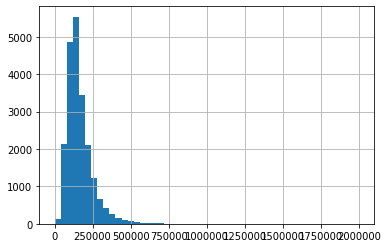

In [1169]:
data['total_income'].hist(bins=50, range=(0, 2000000))

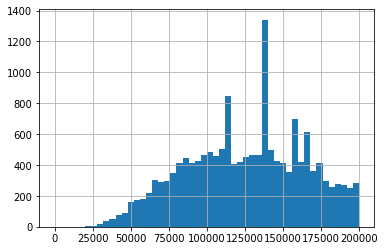

In [1170]:
data['total_income'].hist(bins=50, range=(0, 200000))

In [1171]:
# Using a function, categorized clients' income into 4 groups.
def income_group(total_income):
    if total_income <= 75000:
        return 'низкий'
    if total_income <= 145000:
        return 'средний'
    if total_income <= 250000:
        return 'высокий'
    return 'очень высокий'

data['income_group'] = data['total_income'].apply(income_group)
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group,family_single_status,family_group,income_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые,1,семейный,очень высокий
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые,1,семейный,средний
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые,1,семейный,высокий
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые,1,семейный,очень высокий
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые,1,семейный,высокий


In [1209]:
data.describe()

,children,dob_years,education_id,family_status_id,debt,total_income,years_employed,family_single_status
count,21302.000000,21302.000000,21302.000000,21302.000000,21302.000000,2.130200e+04,21302.000000,21302.000000
mean,0.473148,43.503474,0.817811,0.971834,0.080931,1.654200e+05,13.446844,0.869355
std,0.751636,12.252843,0.548820,1.419930,0.272736,9.838436e+04,17.024582,0.337020
min,0.000000,19.000000,0.000000,0.000000,0.000000,2.066726e+04,0.066141,0.000000
25%,0.000000,33.000000,1.000000,0.000000,0.000000,1.077143e+05,2.817013,1.000000
50%,0.000000,43.000000,1.000000,0.000000,0.000000,1.434947e+05,6.014388,1.000000
75%,1.000000,53.000000,1.000000,1.000000,0.000000,1.981299e+05,13.128901,1.000000
max,5.000000,75.000000,4.000000,4.000000,1.000000,2.265604e+06,50.380685,1.000000


### Conclusion

Created dictionaries `income_type_dict` and `purpose_modified_dict` and converted them into numeric columns 
`income_type_id` and `purpose_modified_id`, as it will be easier to work with numeric data later.

## Conclusion
### Categorized data across several parameters:
1.1. For the `children` column, categorized by number of children into the columns `have_children` and `children_group`.
2. For the `dob_years` column, divided into 3 age groups and stored in the column `dobs_age_group`.
3. For the `family_status` column, categorized by marital status into the columns `family_single_status` and `family_group`.
4. For the `total_income` column, divided into 3 income groups and stored in the column `income_group`. Adjusted the income intervals based on Rosstat data.

### Step 3. Answer the questions

- Is there a relationship between having children and repaying the loan on time?

In [1172]:
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group,family_single_status,family_group,income_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые,1,семейный,очень высокий
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые,1,семейный,средний
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые,1,семейный,высокий
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые,1,семейный,очень высокий
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые,1,семейный,высокий


In [1173]:
# Created a dictionary for the children column.
df_1 = data[['children','children_group','debt']]
df_1.head()

,children,children_group,debt
0,1,до 2х детей,0
1,1,до 2х детей,0
2,0,бездетные,0
3,3,многодетные,0
4,0,бездетные,0


In [1174]:
data_debt_0 = df_1[df_1['debt'] == 0]
data_debt_1 = df_1[df_1['debt'] == 1]
debt_by_children = df_1.groupby('children')['debt'].count()
debt_by_children

children
0    14080
1     4802
2     2042
3      328
4       41
5        9
Name: debt, dtype: int64

In [1175]:
debt_0_by_children = data_debt_0.groupby('children')['debt'].count()
debt_0 = debt_0_by_children/debt_by_children * 100
debt_0

children
0     92.485795
1     90.816327
2     90.499510
3     91.768293
4     90.243902
5    100.000000
Name: debt, dtype: float64

In [1176]:
debt_1_by_children = data_debt_1.groupby('children')['debt'].count()
debt_1 = debt_1_by_children/debt_by_children * 100
debt_1

children
0    7.514205
1    9.183673
2    9.500490
3    8.231707
4    9.756098
5         NaN
Name: debt, dtype: float64

In [1177]:
children_group_pivot = df_1.pivot_table(index=['children_group'], values='debt', aggfunc='sum')
children_group_pivot

,debt
children_group,
бездетные,1058
до 2х детей,635
многодетные,31


In [1178]:
children_group_pivot = df_1.pivot_table(index=['children_group'], columns='debt', aggfunc='count')
children_group_pivot

children      
debt                  0     1
children_group               
бездетные         13022  1058
до 2х детей        6209   635
многодетные         347    31

In [1179]:
children_group_pivot.set_axis(['0', '1'], axis = 'columns', inplace=True)
children_group_pivot['ratio'] = children_group_pivot['1'] / children_group_pivot['0']
children_group_pivot

,0,1,ratio
children_group,,,
бездетные,13022,1058,0.081247
до 2х детей,6209,635,0.102271
многодетные,347,31,0.089337


Approximately 0% of defaulters have 1, 2, or 4 children, which could suggest that the number of children affects loan repayment. However, 100% of clients with 5 children and about 92% of clients with 3 children (≈ 92% of clients without children) have no overdue loans. This may indicate that the number of children does not significantly affect timely loan repayment.

## Conclusion:
#### Created a dictionary for 3 columns and then attached a pivot_table based on the dictionary. From the table, it is visible that the number of late repayments is higher among clients with up to 2 children.

- Is there a relationship between marital status and timely loan repayment?

In [1180]:
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group,family_single_status,family_group,income_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые,1,семейный,очень высокий
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые,1,семейный,средний
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые,1,семейный,высокий
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые,1,семейный,очень высокий
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые,1,семейный,высокий


In [1181]:
# Dictionary: "Single" vs. "All others"
df_2 = data[['family_status','family_single_status','debt']]
df_2.head()

,family_status,family_single_status,debt
0,женат / замужем,1,0
1,женат / замужем,1,0
2,женат / замужем,1,0
3,женат / замужем,1,0
4,гражданский брак,1,0


In [1182]:
data_debt_0 = df_2[df_2['debt'] == 0]
data_debt_1 = df_2[df_2['debt'] == 1]
debt_by_family = df_2.groupby('family_status')['debt'].count()
debt_by_family

family_status
Не женат / не замужем     2783
в разводе                 1179
вдовец / вдова             947
гражданский брак          4139
женат / замужем          12254
Name: debt, dtype: int64

In [1183]:
debt_0_by_family = data_debt_0.groupby('family_status')['debt'].count()
debt_0 = debt_0_by_family / debt_by_family * 100
debt_0

family_status
Не женат / не замужем    90.226374
в разводе                92.875318
вдовец / вдова           93.453010
гражданский брак         90.746557
женат / замужем          92.467766
Name: debt, dtype: float64

In [1184]:
debt_1_by_family = data_debt_1.groupby('family_status')['debt'].count()
debt_1 = debt_1_by_family / debt_by_family * 100
debt_1

family_status
Не женат / не замужем    9.773626
в разводе                7.124682
вдовец / вдова           6.546990
гражданский брак         9.253443
женат / замужем          7.532234
Name: debt, dtype: float64

In [1185]:
family_sigle_status_pivot = df_2.pivot_table(index=['family_single_status'], values='debt', aggfunc='sum')
family_sigle_status_pivot

,debt
family_single_status,
0,272
1,1452


In [1186]:
family_sigle_status_pivot = df_2.pivot_table(index=['family_single_status'], columns='debt', aggfunc='count')
family_sigle_status_pivot

family_status      
debt                             0     1
family_single_status                    
0                             2511   272
1                            17067  1452

In [1187]:
family_sigle_status_pivot.set_axis(['0', '1'], axis = 'columns', inplace=True)
family_sigle_status_pivot['ratio'] = family_sigle_status_pivot['1'] / family_sigle_status_pivot['0']
family_sigle_status_pivot

,0,1,ratio
family_single_status,,,
0,2511,272,0.108323
1,17067,1452,0.085076


In [1188]:
# Dictionary: "Married" vs. "Unmarried"
df_2_family = data[['family_status','family_group','debt']]
df_2_family.head()

,family_status,family_group,debt
0,женат / замужем,семейный,0
1,женат / замужем,семейный,0
2,женат / замужем,семейный,0
3,женат / замужем,семейный,0
4,гражданский брак,семейный,0


In [1189]:
family_group_pivot = df_2_family.pivot_table(index=['family_group'], values='debt', aggfunc='sum')
family_group_pivot

,debt
family_group,
семейный,1306
холостой,418


In [1190]:
family_group_pivot = df_2_family.pivot_table(index=['family_group'], columns='debt', aggfunc='count')
family_group_pivot

family_status      
debt                     0     1
family_group                    
семейный             15087  1306
холостой              4491   418

In [1191]:
family_group_pivot.set_axis(['0', '1'], axis = 'columns', inplace=True)
family_group_pivot['ratio'] = family_group_pivot['1'] / family_group_pivot['0']
family_group_pivot

,0,1,ratio
family_group,,,
семейный,15087,1306,0.086565
холостой,4491,418,0.093075


### Conclusion

Most clients taking loans have the marital status “Civil partnership” or “Married.” Defaulters are mainly clients with the status “Single.” This may indicate that there is no significant relationship between marital status and timely loan repayment.

## Conclusion
##### Two pivot_tables were created for analysis: the first compared “Single” vs. “All others,” and the second grouped “Married” and “Civil partnership” vs. all single clients. The main clients with overdue loans are “Single” clients.

- Is there a relationship between income level and timely loan repayment?

In [1192]:
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group,family_single_status,family_group,income_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые,1,семейный,очень высокий
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые,1,семейный,средний
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые,1,семейный,высокий
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые,1,семейный,очень высокий
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые,1,семейный,высокий


In [1193]:
# Income dictionary
df_3 = data[['total_income','income_group','debt']]
df_3.head()

,total_income,income_group,debt
0,253875.639453,очень высокий,0
1,112080.014102,средний,0
2,145885.952297,высокий,0
3,267628.550329,очень высокий,0
4,158616.077870,высокий,0


In [1194]:
data_debt_0 = df_3[df_3['debt'] == 0]
data_debt_1 = df_3[df_3['debt'] == 1]
debt_by_income = data.groupby('income_group')['debt'].count()
debt_by_income

income_group
высокий          7636
низкий           1845
очень высокий    2784
средний          9037
Name: debt, dtype: int64

In [1195]:
debt_0_by_income = data_debt_0.groupby('income_group')['debt'].count()
debt_0_by_income / debt_by_income * 100

income_group
высокий          92.011524
низкий           92.628726
очень высокий    93.067529
средний          91.313489
Name: debt, dtype: float64

In [1196]:
debt_1_by_income = data_debt_1.groupby('income_group')['debt'].count()
debt_1 = debt_1_by_income / debt_by_income * 100
debt_1

income_group
высокий          7.988476
низкий           7.371274
очень высокий    6.932471
средний          8.686511
Name: debt, dtype: float64

In [1197]:
income_group_pivot = data.pivot_table(index=['income_group'], values='debt', aggfunc='sum')
income_group_pivot

,debt
income_group,
высокий,610
низкий,136
очень высокий,193
средний,785


In [1198]:
income_group_pivot = df_3.pivot_table(index=['income_group'], columns='debt', aggfunc='count')
income_group_pivot

total_income     
debt                     0    1
income_group                   
высокий               7026  610
низкий                1709  136
очень высокий         2591  193
средний               8252  785

In [1199]:
income_group_pivot.set_axis(['0', '1'], axis = 'columns', inplace=True)
income_group_pivot['ratio'] = income_group_pivot['1'] / income_group_pivot['0']
income_group_pivot

,0,1,ratio
income_group,,,
высокий,7026,610,0.086820
низкий,1709,136,0.079579
очень высокий,2591,193,0.074489
средний,8252,785,0.095128


### Conclusion

После сведения таблицы по вышеуказанном параметрам, видно, что средний доход людей, имеющие и не имеющие долги, приблизительно одинаковые. Это указывает на то, что уровень дохода не влияет на возврат кредита в срок.

## Conclusion
#### After aggregating the table, it appears that the rate of late repayments among high-income clients is higher. However, in calculations, this rate is approximately the same. The difference in the table may be due to the fact that the total number of clients with average income is smaller than other groups. Another possibility is that the clients' income data is incorrect or overstated.

- How do different loan purposes affect timely repayment? 

In [1200]:
data.head()

,children,dob_years,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,education_lowercase,purpose_modified,children_group,dobs_age_group,family_single_status,family_group,income_group
0,1,42,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья,23.116912,высшее,недвижимость,до 2х детей,взрослые,1,семейный,очень высокий
1,1,36,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля,11.026860,среднее,автомобиль,до 2х детей,взрослые,1,семейный,средний
2,0,33,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья,15.406637,среднее,недвижимость,бездетные,взрослые,1,семейный,высокий
3,3,32,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование,11.300677,среднее,образование,многодетные,взрослые,1,семейный,очень высокий
4,0,53,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу,50.380685,среднее,свадьба,бездетные,взрослые,1,семейный,высокий


In [1201]:
# Purpose dictionary
df_4 = data[['purpose','purpose_modified','debt']]
df_4.head()

,purpose,purpose_modified,debt
0,покупка жилья,недвижимость,0
1,приобретение автомобиля,автомобиль,0
2,покупка жилья,недвижимость,0
3,дополнительное образование,образование,0
4,сыграть свадьбу,свадьба,0


In [1202]:
data_debt_0 = df_4[df_4['debt'] == 0]
data_debt_1 = df_4[df_4['debt'] == 1]
debt_by_purpose = data.groupby('purpose_modified')['debt'].count()
debt_by_purpose

purpose_modified
автомобиль       4267
недвижимость    10733
образование      3979
свадьба          2323
Name: debt, dtype: int64

In [1203]:
data_debt_0_by_purpose = data_debt_0.groupby('purpose_modified')['debt'].count()
debt_0 = data_debt_0_by_purpose / debt_by_purpose * 100
debt_0

purpose_modified
автомобиль      90.696039
недвижимость    92.760645
образование     90.726313
свадьба         92.208351
Name: debt, dtype: float64

In [1204]:
debt_1_by_purpose = data_debt_1.groupby('purpose_modified')['debt'].count()
debt_1 = debt_1_by_purpose / debt_by_purpose * 100
debt_1

purpose_modified
автомобиль      9.303961
недвижимость    7.239355
образование     9.273687
свадьба         7.791649
Name: debt, dtype: float64

In [1205]:
purpose_pivot = df_4.pivot_table(index=['purpose_modified'], values='debt', aggfunc='sum')
purpose_pivot

,debt
purpose_modified,
автомобиль,397
недвижимость,777
образование,369
свадьба,181


In [1206]:
purpose_pivot = df_4.pivot_table(index=['purpose_modified'], columns='debt', aggfunc='count')
purpose_pivot

purpose     
debt                   0    1
purpose_modified             
автомобиль          3870  397
недвижимость        9956  777
образование         3610  369
свадьба             2142  181

In [1207]:
purpose_pivot.set_axis(['0', '1'], axis = 'columns', inplace=True)
purpose_pivot['ratio'] = purpose_pivot['1'] / purpose_pivot['0']
purpose_pivot

,0,1,ratio
purpose_modified,,,
автомобиль,3870,397,0.102584
недвижимость,9956,777,0.078043
образование,3610,369,0.102216
свадьба,2142,181,0.084500


In [1208]:
# This is not required by the assignment, but I believe this table will be useful for analyzing timely loan repayment 
# depending on marital status, number of children, and clients' average income. 
data_pivot = data.pivot_table(index=['family_group', 'children_group'], columns='debt', values='total_income', aggfunc='mean')
data_pivot

debt                                     0              1
family_group children_group                              
семейный     бездетные       164065.097453  159149.122040
             до 2х детей     170584.374823  163795.940445
             многодетные     182029.977277  152369.858043
холостой     бездетные       161482.194518  160522.909210
             до 2х детей     167381.999169  164610.566313
             многодетные     164472.966119  126141.186146

### Conclusion

Most clients have loan purposes related to "car" and "education." When examining the proportion of clients with overdue loans, it is evident that the majority of defaulters have loan purposes related to "real estate," "car," or "education."


### Step 4. Overall Conclusion

After examining the input data on clients' creditworthiness, one might conclude that marital status and number of children do not affect timely loan repayment.

#### General Conclusion
#### In contrast to the previous conclusion, after analyzing, calculating, and creating pivot tables from the clients' creditworthiness data, it can be concluded that marital status does affect timely loan repayment. However, the number of children does not seem to play a significant role, since most clients with overdue loans have no children. 

<span style="color:blue"> After data cleaning and correction, it can be concluded that marital status does affect timely repayment, as the majority of late repayments occur among "Single" clients. Additionally, the number of children does have some effect, since the majority of overdue loans are among clients with "up to 2 children."<span

### Project Readiness Checklist

Mark completed items with an 'x'. Then press Shift + Enter.

- [x]  the file is opened;
- [x]  the file has been reviewed;
- [x]  missing values have been identified;
- [x]  missing values have been filled;
- [x]  there is an explanation of which missing values were found;
- [x]  possible reasons for missing values in the data are described;
- [x]  the principle used to fill missing values is explained;
- [x]  floating-point data types have been converted to integers;
- [x]  there is an explanation of which method was used to change the data type and why;
- [x]  duplicates have been removed;
- [x]  there is an explanation of which method was used to find and remove duplicates;
- [x]  possible reasons for duplicates in the data are described;
- [x]  lemmas have been extracted from the values in the column with loan purposes;
- [x]  the lemmatization process is described;
- [x]  the data have been categorized;
- [x]  the principle of data categorization is explained;
- [x]  there is an answer to the question: “Is there a relationship between having children and repaying the loan on time?”;
- [x] there is an answer to the question: “Is there a relationship between marital status and repaying the loan on time?”;
- [x]  there is an answer to the question: “Is there a relationship between income level and repaying the loan on time?”;
- [x]  еthere is an answer to the question: “How do different loan purposes affect on-time repayment?”;
- [x]  conclusions are provided at each stage;
- [x] a general conclusion is provided.